**Задание**

    Банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

    После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Исследуем и очистим данные

In [2]:
df = pd.read_csv('data/churn/churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Проверим наличие дубликатов
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# Проверим наличие пропусков:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Удалим неинформативные признаки
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

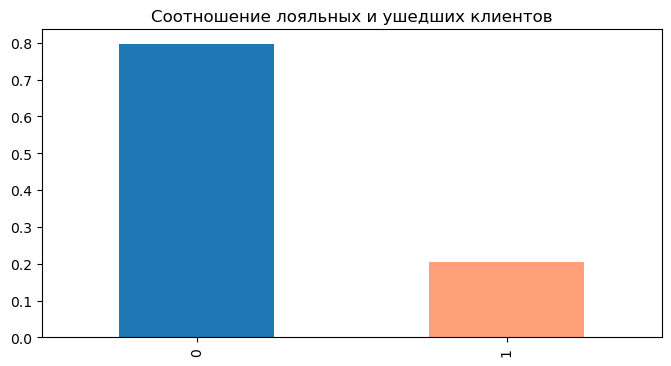

In [235]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
df.Exited.value_counts(normalize=True).plot(kind='bar', color=['tab:blue', 'lightsalmon'])
axes.set_title('Соотношение лояльных и ушедших клиентов');

К сожалению, в банке уходит каждый 5й клиент (соотношение ушедших к оставшимся 1/4).

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

''

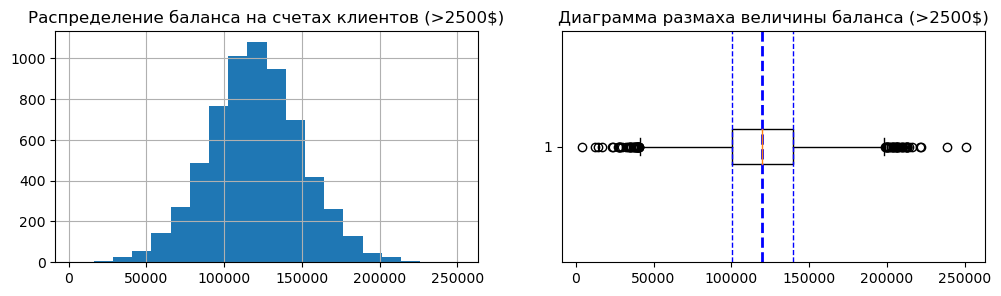

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

axes[0].hist(x=df[df.Balance > 2500].Balance,
             label='Баланс',
             bins=20,
            )
axes[0].grid()
axes[0].set_title('Распределение баланса на счетах клиентов (>2500$)')

axes[1].boxplot(x=df[df.Balance > 2500].Balance,
                vert=False,
                
               )
axes[1].set_title('Диаграмма размаха величины баланса (>2500$)')
axes[1].axvline(df[(df.Balance > 2500)].Balance.mean(), 
                color='b', 
                linestyle='dashed', 
                linewidth=2);
axes[1].axvline(df[(df.Balance > 2500)].Balance.quantile(0.25), 
                color='b', 
                linestyle='dashed', 
                linewidth=1);
axes[1].axvline(df[(df.Balance > 2500)].Balance.quantile(0.75), 
                color='b', 
                linestyle='dashed', 
                linewidth=1);
;

Несмотря на то, что распределение величины баланса на промежутке, превышающем $$2500, очень похоже на нормальное (в частности, медиана и среднее совпадают), мы видим большое число выбросов на хвостах. Большая часть клиентов хранит на балансе суммы в промежутке от 100 до 140тыс.$

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

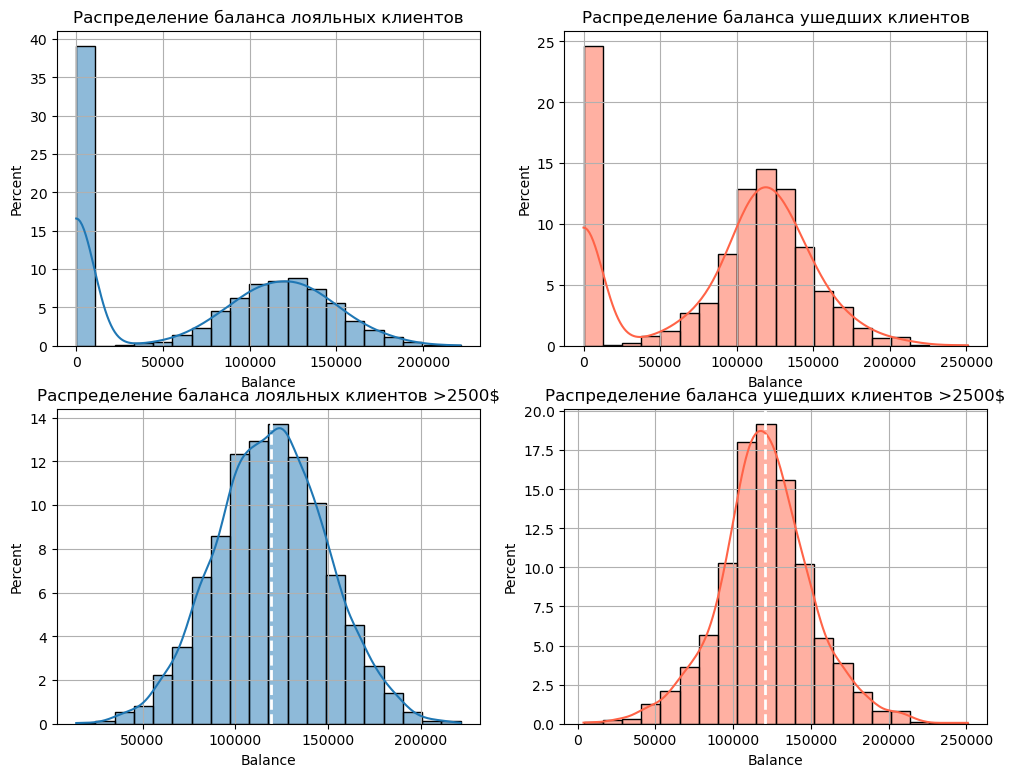

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

sns.histplot(
    data=df[(df.Exited == 0)],
    x='Balance',
    bins=20,
    stat='percent',
    kde=True,
    ax=axes[0, 0]
);
axes[0,0].grid()
axes[0,0].set_title('Распределение баланса лояльных клиентов')

sns.histplot(
    data=df[(df.Exited == 1)],
    x='Balance',
    bins=20,
    stat='percent',
    kde=True,
    ax=axes[0, 1],
    color='tomato',
);
axes[0,1].grid()
axes[0,1].set_title('Распределение баланса ушедших клиентов')

sns.histplot(
    data=df[(df.Balance > 2500) & (df.Exited == 0)],
    x='Balance',
    bins=20,
    stat='percent',
    kde=True,
    ax=axes[1, 0]
);
axes[1,0].grid()
axes[1,0].set_title('Распределение баланса лояльных клиентов >2500$')
axes[1,0].axvline(df[(df.Balance > 2500) & (df.Exited == 0)].Balance.mean(), 
                color='w', 
                linestyle='dashed', 
                linewidth=2)

sns.histplot(
    data=df[(df.Balance > 2500) & (df.Exited == 1)],
    x='Balance',
    bins=20,
    stat='percent',
    kde=True,
    ax=axes[1, 1],
    color='tomato',
);
axes[1,1].grid()
axes[1,1].set_title('Распределение баланса ушедших клиентов >2500$')
axes[1,1].axvline(df[(df.Balance > 2500) & (df.Exited == 1)].Balance.mean(), 
                color='w', 
                linestyle='dashed', 
                linewidth=2);

    Мы видим, что распредление баланса счета для ушедших и оставшихся клиентов схоже на промежутке свыше $2500, однако имеет меньший разброс. При этом околонулевой баланс был только у 25% ушедших клиентов и 40% оставшихся.
    Можно предположить, что часть ушедших клиентов приходила в банк за каким-то конкретным продуктом, возможно, депозитом с определененными условиями, и ушла после его истечения.

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

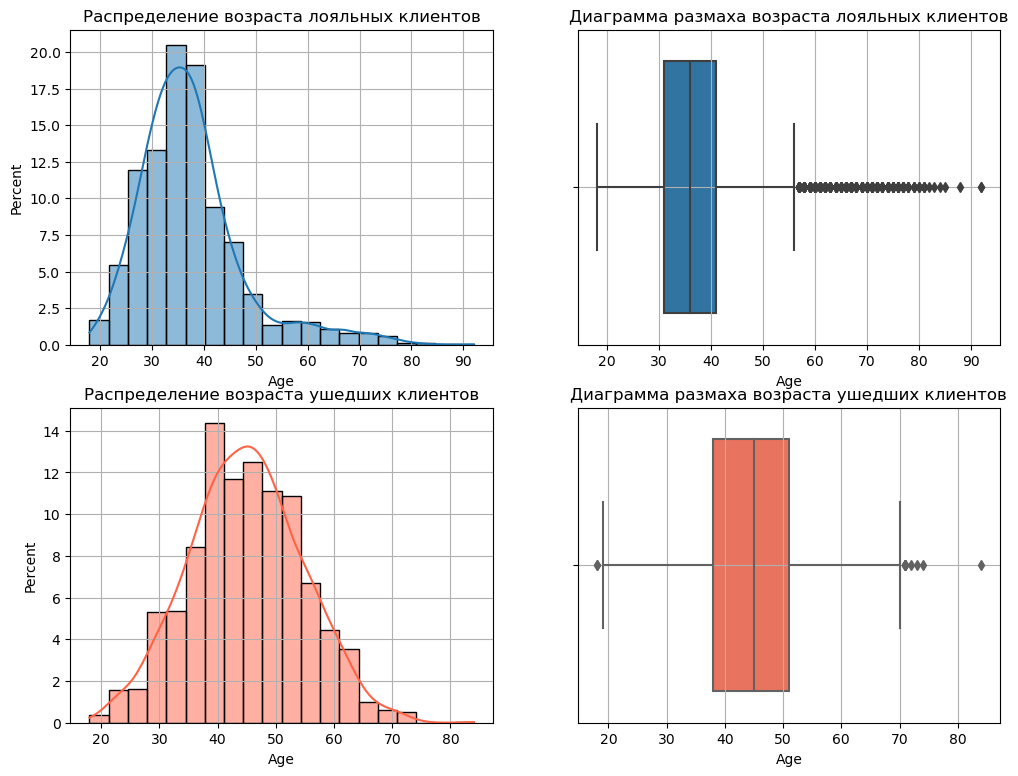

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

sns.histplot(
    data=df[(df.Exited == 0)],
    x='Age',
    bins=20,
    stat='percent',
    kde=True,
    ax=axes[0, 0]
);
axes[0,0].grid()
axes[0,0].set_title('Распределение возраста лояльных клиентов')

sns.boxplot(
    data=df[(df.Exited == 0)],
    x='Age',
    ax=axes[0, 1],
);
axes[0,1].grid()
axes[0,1].set_title('Диаграмма размаха возраста лояльных клиентов')

sns.histplot(
    data=df[(df.Exited == 1)],
    x='Age',
    bins=20,
    stat='percent',
    kde=True,
    ax=axes[1, 0],
    color='tomato',
);
axes[1,0].grid()
axes[1,0].set_title('Распределение возраста ушедших клиентов')

sns.boxplot(
    data=df[(df.Exited == 1)],
    x='Age',
    ax=axes[1, 1],
    color='tomato',
);
axes[1,1].grid()
axes[1,1].set_title('Диаграмма размаха возраста ушедших клиентов');

Мы видим большой перекос выбывших клиентов в старшие возраста. Исходя из приведенных выше графиков хочется задать допольнительные вопросы:
- Связано ли это с отсутствием подходящих продуктов для лиц, готовящихся к пенсии, и пенсионеров?
- Какой процент ушедших можно объяснить смертностью (это важно, т.к. на эту долю ушедших клиентов банк в принципе никак не сможет повлиять).

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

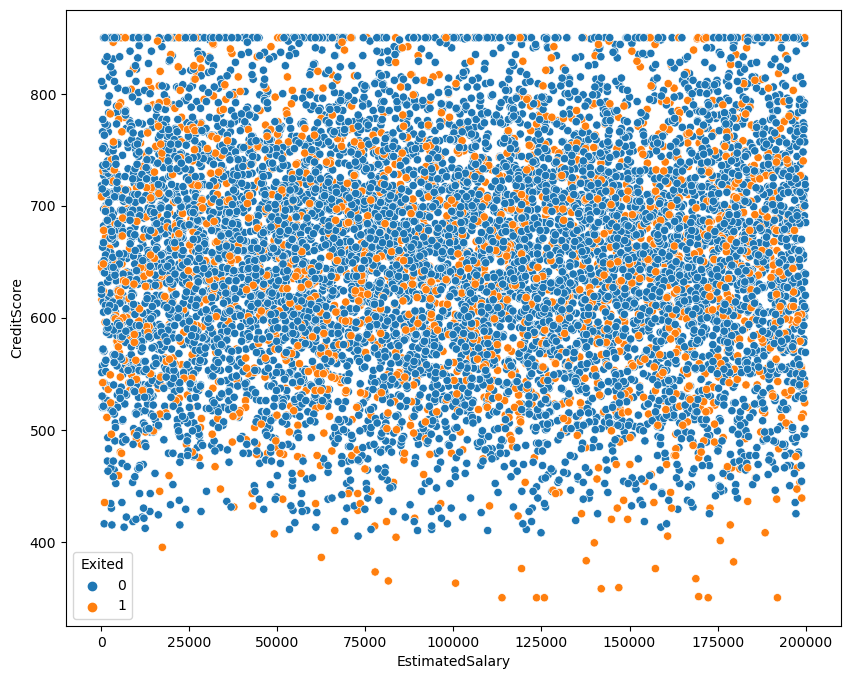

In [79]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

sns.scatterplot(df,
           x='EstimatedSalary',
           y='CreditScore',
               hue='Exited');

Из графика можно заключить, что явной взаимосвязи между величиной зарплаты и кредитным рейтингом нет. Однако одну закономерность мы видим: клиенты с рейтингом ниже 400 уходят из банка. Возможно, это хорошо, и политика банка способствует отфильтровыванию неблагонадежных клиентов. Однако, с учетом того, что многие из них предположительно имеют высокую зарплату, следует внимательнее проанализировать, почему у них был такой низкий кредитный рейтинг, возможно, рейтинговая система неправильно настроена или данным клиентам требуются более гибкие условия обслуживания.

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

''

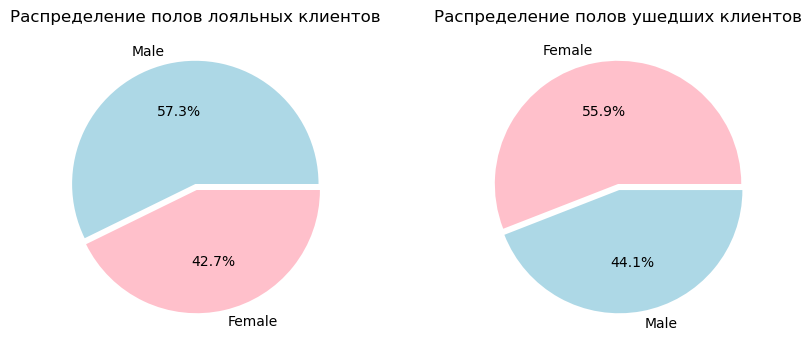

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].pie(
    df[df.Exited == 0].Gender.value_counts(),
    labels=df[df.Exited == 0].Gender.value_counts().index,
    autopct='%.1f%%',
    colors=['lightblue','pink'],
    explode=[0, 0.05]
)
axes[0].set_title('Распределение полов лояльных клиентов')

axes[1].pie(
    df[df.Exited == 1].Gender.value_counts(),
    labels=df[df.Exited == 1].Gender.value_counts().index,
    autopct='%.1f%%',
    colors=['pink','lightblue'],
    explode=[0, 0.05]
)
axes[1].set_title('Распределение полов ушедших клиентов')
;

Почему-то среди ушедших клиентов преобладают женщины. 
Это опять наталкивает на мысль посмотреть, насколько адекватно формируется кредитный рейтинг. Например, часто у женщин ниже уровень подтвержденного дохода, но более высокая финансовая дисциплина - как это отражается на рейтинге?
Еще одна причина ухода может быть связана с отсутствием необходимых женщинам продуктов, например карт с определенным кэшбеком.

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

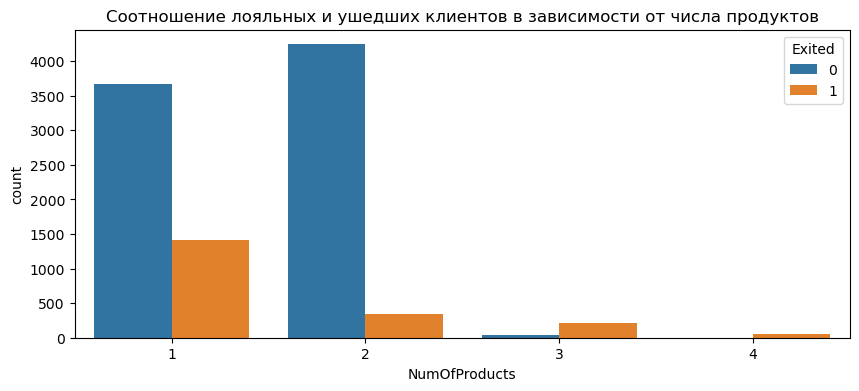

In [126]:
fig, axes = plt.subplots(1, 1, figsize=(10, 4))
sns.barplot(
    data=df.groupby('NumOfProducts', as_index=False).Exited.value_counts(),
    x='NumOfProducts',
    y='count',
    hue='Exited'
)
axes.set_title('Соотношение лояльных и ушедших клиентов в зависимости от числа продуктов');

Мы видим, что большинство клиентов, воспользовавшихся 3 или 4 продуктами, уходят. Самые лояльные клиенты пользуются двумя продуктами. Необходим дальнейший анализ, что это за продукты.

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

''

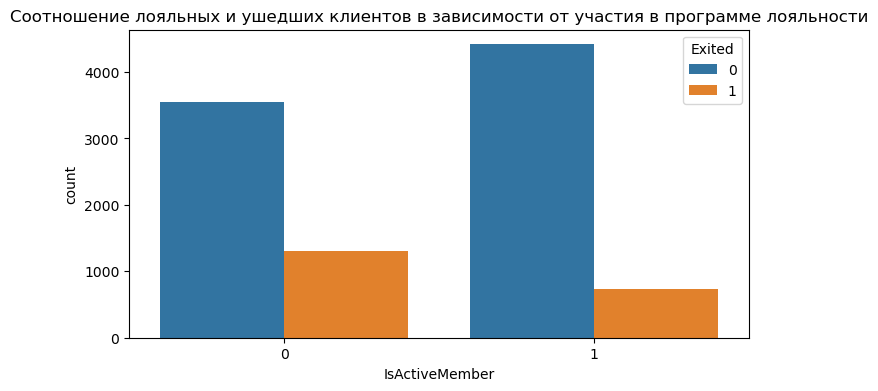

In [195]:
df_active = df.groupby('IsActiveMember', as_index=False)['Exited'].value_counts()

fig, axes = plt.subplots(1, 1, figsize=(8, 4))
barplot = sns.barplot(df_active,
           x='IsActiveMember',
           y='count',
           hue='Exited')
barplot.set_title('Соотношение лояльных и ушедших клиентов в зависимости от участия в программе лояльности')
;

Мы видим, что участие в программе лояльности (ActiveMember) уменьшает долю ушедших клиентов. Возможно, стимулирование участия в ней снизит churn rate.

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [165]:
df_geo = df.groupby('Geography')[['Exited']].mean()

fig = px.choropleth(
    data_frame=df_geo, 
    locations=df_geo.index, 
    locationmode = "country names", 
    scope="europe",
    color="Exited",
    range_color=[0, 0.5], 
    title='Доля ушедших клиентов по странам', 
    width=800, 
    height=600, 
    color_continuous_scale='Reds'
)

#отображаем график
fig.show()

Мы видим, что в Германии процент уходящих клиентов сильно больше, чем во Франции и Испании. Выдвинем 2 гипотезы (которые надо далее проверить на основании доп данных):
1) Политика немецкого филиала банка отличается от остальных стран;
2) Разница связана с различной социо-демографической структурой клиентской базы.

In [177]:
df.groupby('Geography').median()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,653.0,37.0,5.0,62153.50,1.0,1.0,1.0,99132.31,0.0
Germany,651.0,38.0,5.0,119703.10,1.0,1.0,0.0,102397.22,0.0
Spain,651.0,37.0,5.0,61710.44,2.0,1.0,1.0,99984.86,0.0


Быстрое сравнение медианных значений по странам дает нам следующие данные: в Германии в среднем клиенты старше, имеют более высокий доход, пользуются одним продуктом и не являются активными участниками - для всех этих категорий характерен высокий процент оттока клиентов.
В связи с этим еще важнее становится проанализировать разницу в политике немецкого филиала, чтобы понять, что является причиной, а что следствием для этих показателей.

### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [217]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [218]:
df['CreditScoreCat'] = df.CreditScore.apply(lambda x: get_credit_score_cat(x))

''

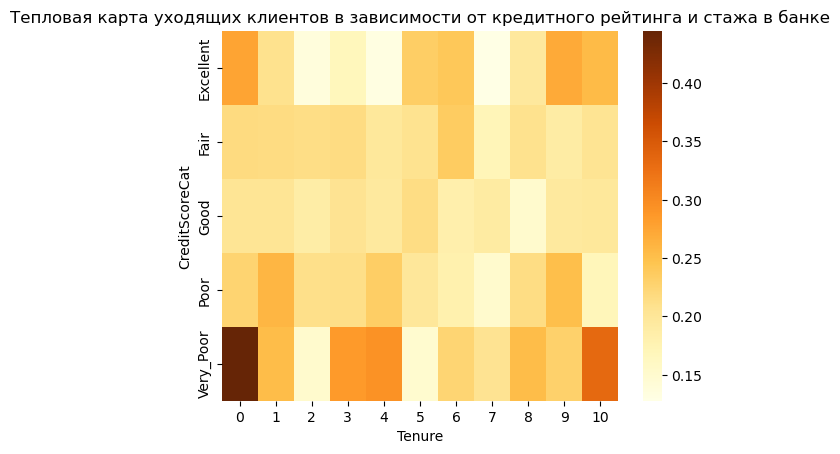

In [219]:
pivot = df.groupby(['Tenure', 'CreditScoreCat'], as_index=False).Exited.mean().pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat')

heatmap = sns.heatmap(data=pivot, cmap='YlOrBr')
heatmap.set_title('Тепловая карта уходящих клиентов в зависимости от кредитного рейтинга и стажа в банке')
;

1) Мы видим, что чаще всего уходят новые клиенты с крайне низким кредитным рейтингом (вероятно, те продукты, которые они надеялись получить в банке, оказались для них недоступны).
2) Далее следуют клиенты с 10-летним стажем, но также крайне низким кредитным рейтингом, вероятно им также оказались недоступны какие-то продукты, в которых они нуждаются.
3) Далее клиенты с 3-4 летним стажем и крайне низким кредитным рейтингом. Вероятно, эти клиенты ожидали, что со временем произойдет улучшение их клиентсокй позиции, но этого не произошло. Возможно, истек срок изначально выпущенной карты, которую клиенты решили не перевыпускать.
4) Далее мы видим много ушедших клиентов среди самого высокого кредитного рейтинга. Здесь можно выделить 3 категории:
 - ушедшие сразу (вероятно, не нашли в нашем банке нужные продукты или качество услуг)
 - ушедшие через 5-6 и через 9-10 лет (возможно, нет каких-то дополнительных программ, связанных с изменением их социального статуса, например роста кредитного лимита, программ ипотеки, пенсионного страхования и т.д. или премиального обслуживания), или это может быть баналоьное прекращение срочного депозита, который нечем заменить в рамках продуктов нашего банка.